In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# seed for reproducibility
np.random.seed(42)

# Generate 200 random x values between 0 and 10
X = np.random.uniform(0, 10, 200)

# Calculate Y using a quadratic relationship and add some noise
Y = -X**2 + 10*X + np.random.normal(0, 5, 200)

# Convert X and Y into a Dataframe for easier manipulation
df = pd.DataFrame({'x':X, 'y':Y})

df.head()

,x,y
0,3.745401,20.025858
1,9.507143,5.846930
2,7.319939,21.083243
3,5.986585,20.454893
4,1.560186,22.496555


In [18]:
df['x_squared'] = df['x']**2

df.head()

,x,y,x_squared
0,3.745401,20.025858,14.028030
1,9.507143,5.846930,90.385769
2,7.319939,21.083243,53.581513
3,5.986585,20.454893,35.839198
4,1.560186,22.496555,2.434182


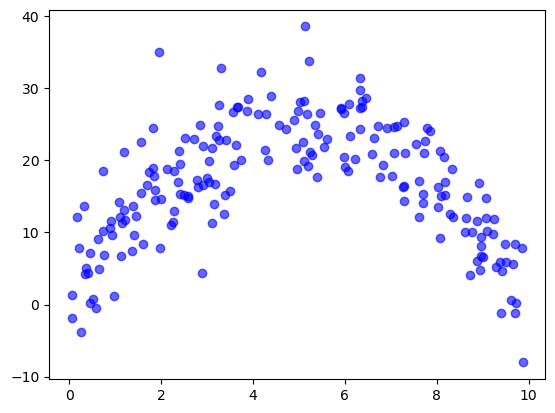

In [19]:
df_sorted = df.sort_values(by='x')

plt.scatter(df_sorted['x'], df_sorted['y'], color='blue', label='Actual Data', alpha=0.6)

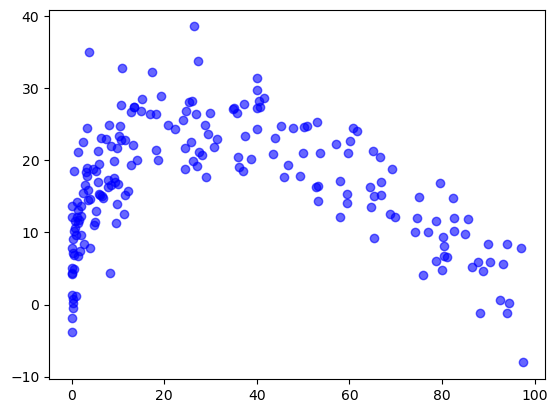

In [20]:
plt.scatter(df_sorted['x_squared'], df_sorted['y'], color='blue', label='Actual Data', alpha=0.6)

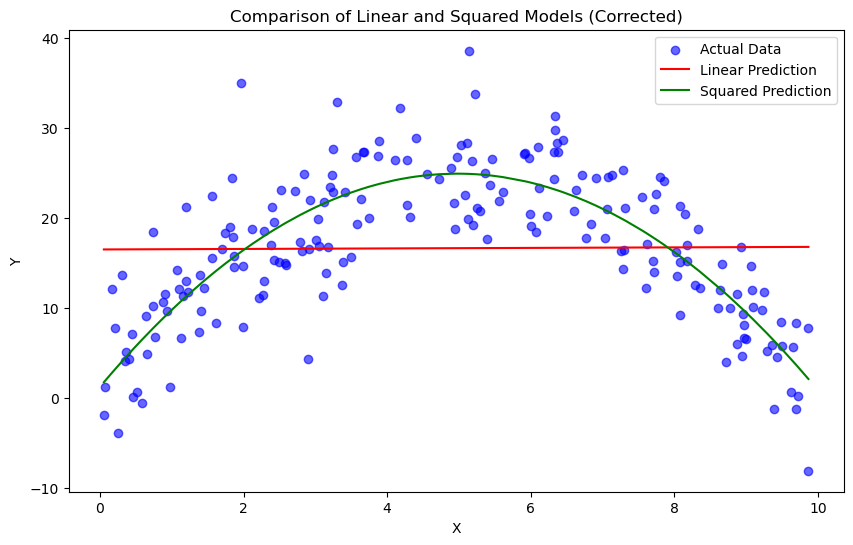

In [21]:
# Linear model using X
linear_model = LinearRegression()
linear_model.fit(df[['x']], df['y'])
df['Linear_prediction'] = linear_model.predict(df[['x']])

# Linear model using X^2
squared_model = df['x']**2
squared_model = LinearRegression()
squared_model.fit(df[['x', 'x_squared']], df['y'])
df['squared_prediction'] = squared_model.predict(df[['x','x_squared']])

# Sort the dataframe by X values for bettwe plotting
df_sorted = df.sort_values(by='x')

# Plot the data and the models with sorted values
plt.figure(figsize=(10,6))
plt.scatter(df_sorted['x'],df_sorted['y'],color='blue',label='Actual Data',alpha=0.6)
plt.plot(df_sorted['x'],df_sorted['Linear_prediction'],color='red', label='Linear Prediction')
plt.plot(df_sorted['x'], df_sorted['squared_prediction'],color='green',label='Squared Prediction')
plt.title('Comparison of Linear and Squared Models (Corrected)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [24]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
df.skew()['crim']

5.223148798243851

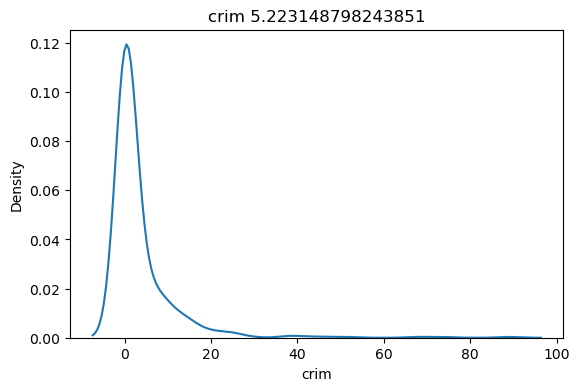

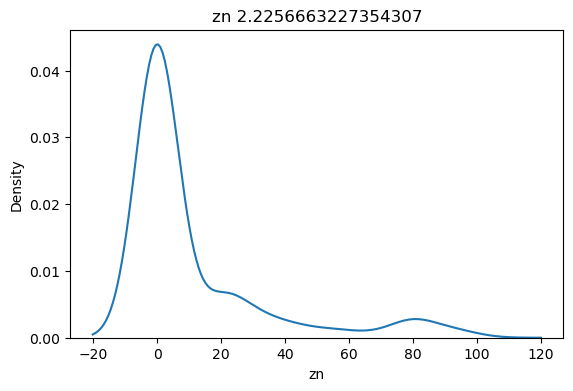

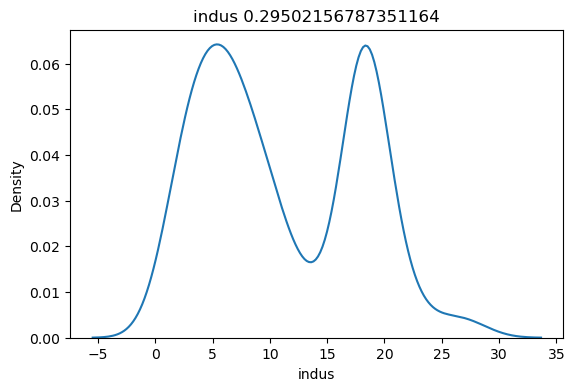

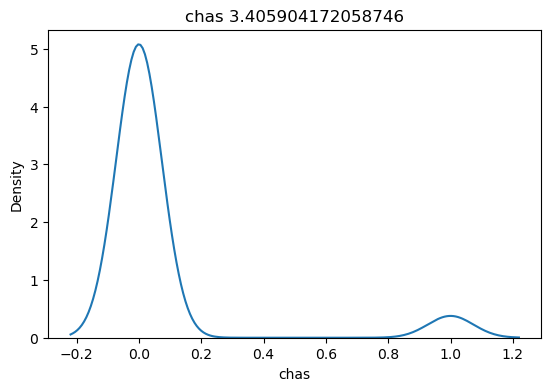

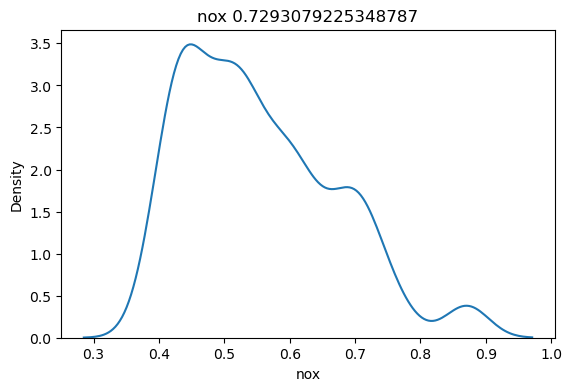

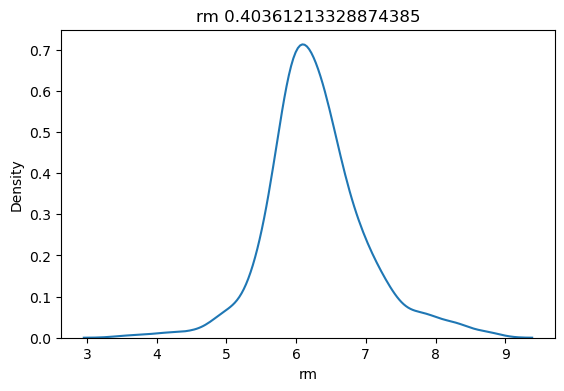

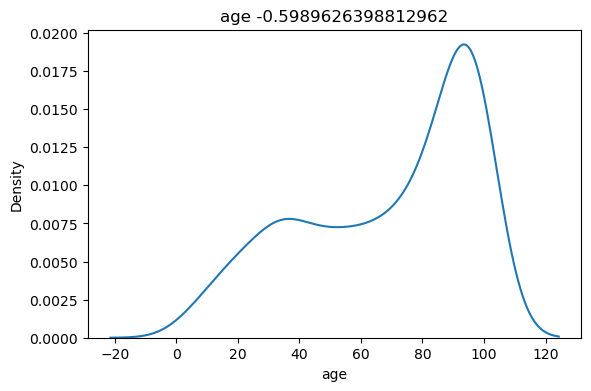

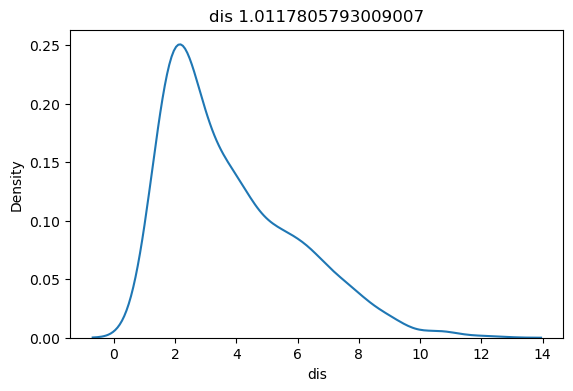

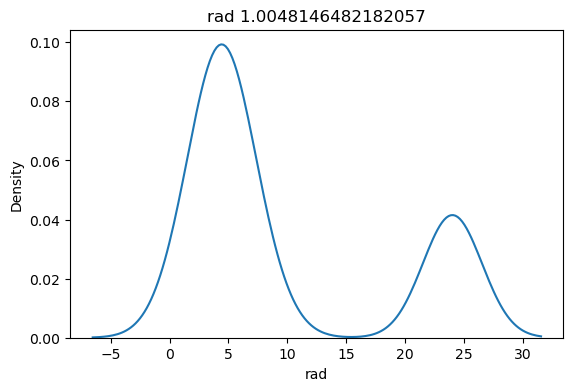

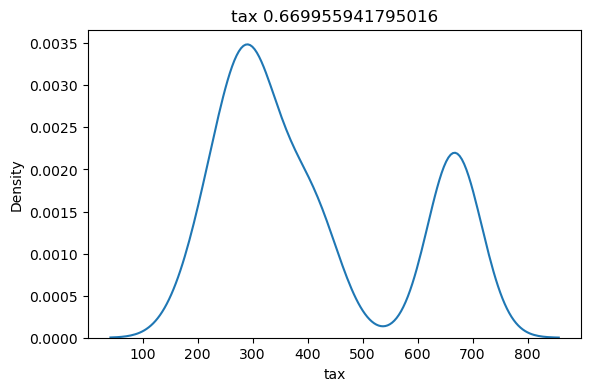

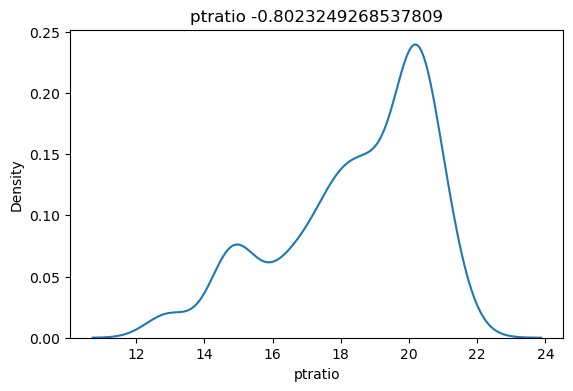

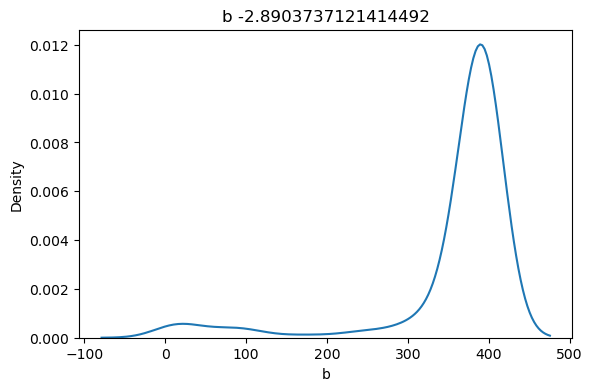

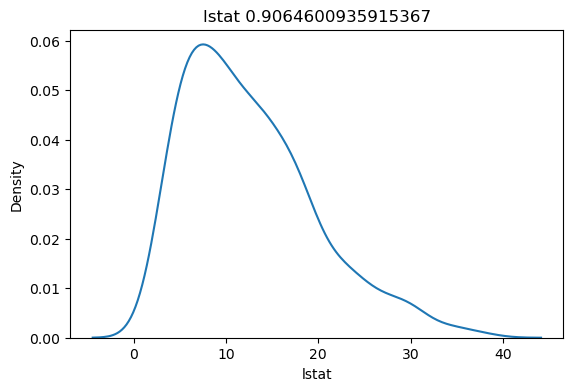

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distplot without any transformation

for col in df.columns[0:-1]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df[col])
    txt = col + " " + str(df.skew()[col])
    plt.title(txt)
    plt.show()

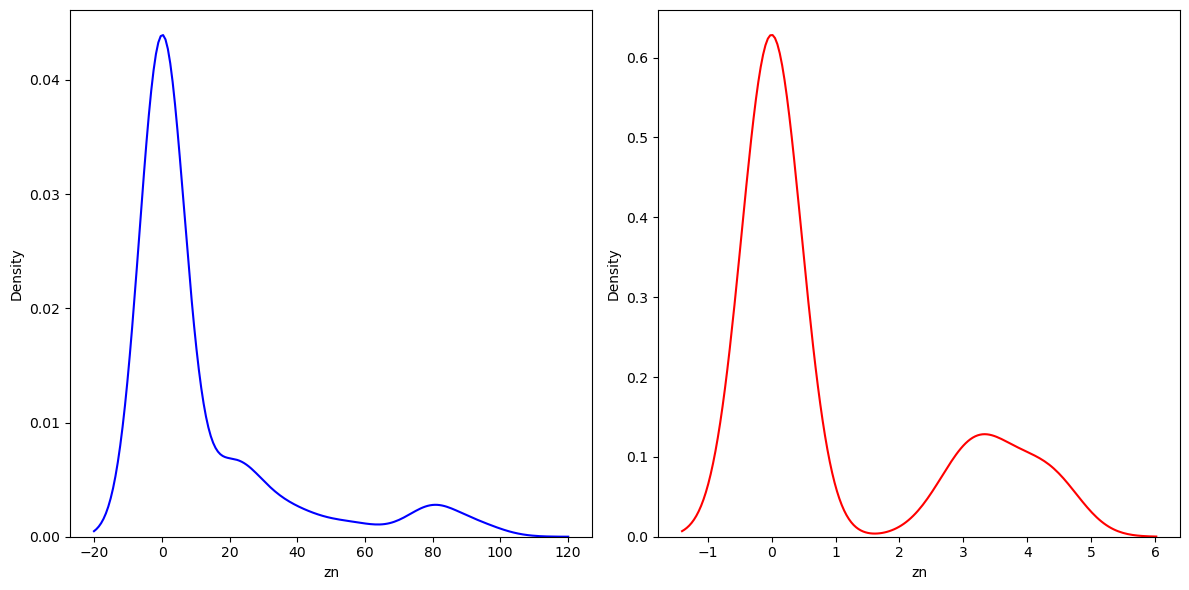

skew before log transform 2.219063057148425
skew after log transform 1.1899105701640726


In [27]:
# log on zn feature

# Setting up the matplolib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Plotting the normal distribution
sns.kdeplot(df['zn'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['zn']), color='red',ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['zn']))
print('skew after log transform', skew(np.log1p(df['zn'])))

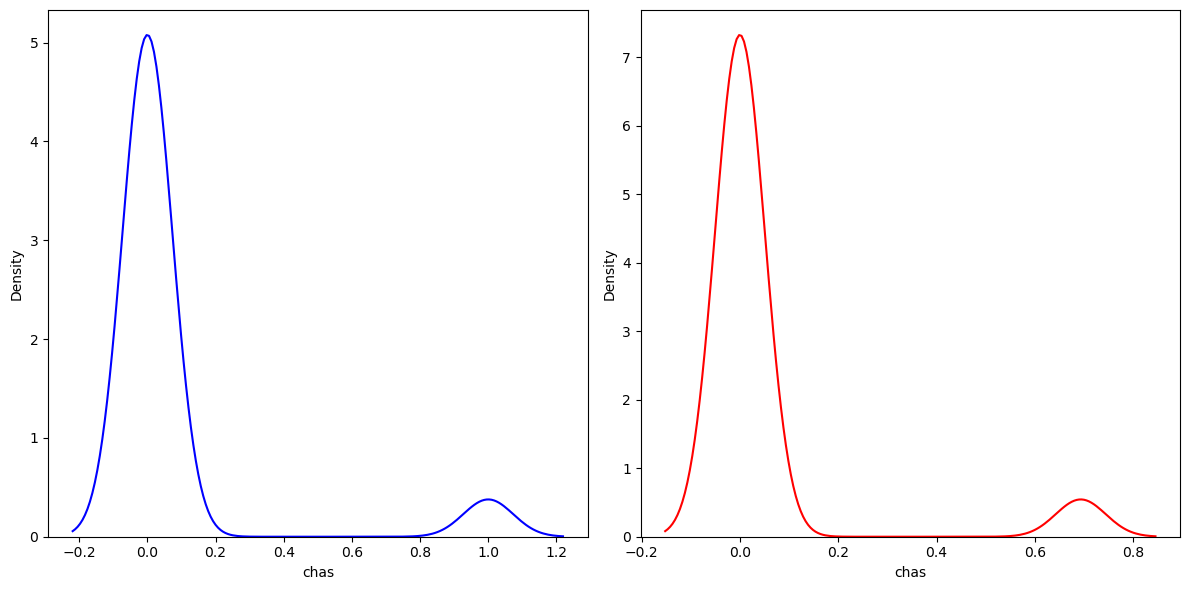

skew before reciprocal transform 3.395799292642519
skew after reciprocal transform 3.3957992926425202


In [28]:
# log on chas

# Setting up the matplotlib figure with two subplots
fig,axs = plt.subplots(ncols=2,figsize=(12,6))

# Plotting the normal distribution
sns.kdeplot(df['chas'],color='blue',ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['chas']),color='red',ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform',skew(df['chas']))
print('skew after reciprocal transform',skew(np.log1p(df['chas'])))

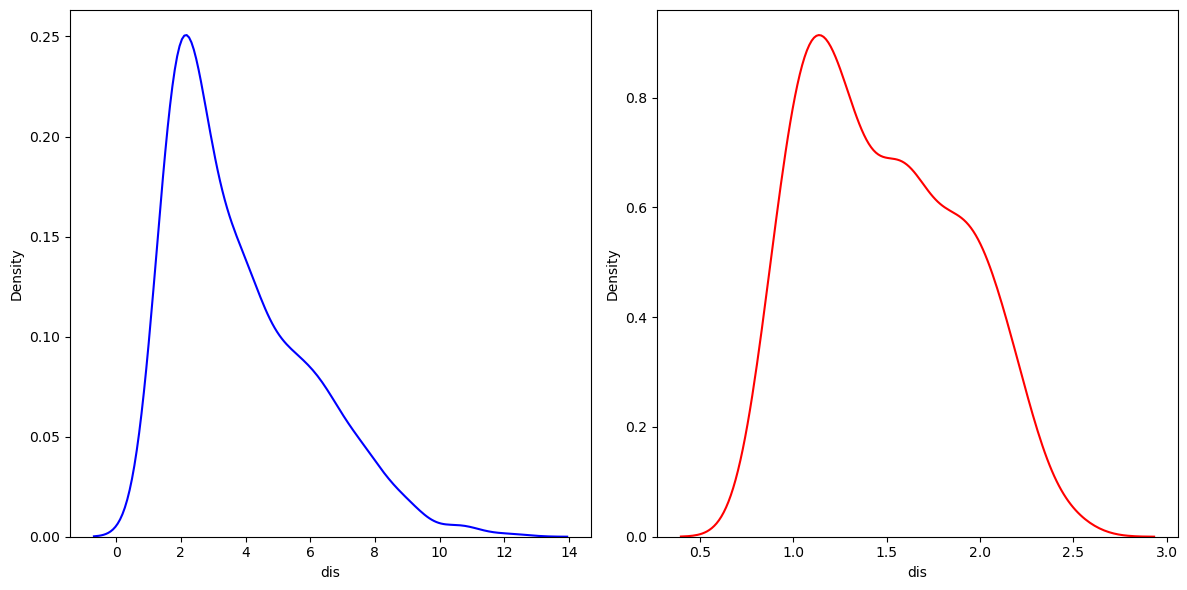

skew before log transform 1.0087787565152246
skew after log transform 0.3305777426343001


In [29]:
# log on dis

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2,figsize=(12,6))

# Plotting the normal distribution
sns.kdeplot(df['dis'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['dis']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew
print('skew before log transform',skew(df['dis']))
print('skew after log transform', skew(np.log1p(df['dis'])))

